In [192]:
from clickhouse_connect import get_client
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set up client
client = get_client(
    host='localhost',
    port=8123,
    username='default',
    password='mysecurepassword'
)

# Define time range
one_hour_ago = datetime.utcnow() - timedelta(hours=1)
query = f"""
SELECT
    timestamp,
    price,
    volume
FROM price_ticks
WHERE timestamp >= toDateTime('{one_hour_ago.strftime('%Y-%m-%d %H:%M:%S')}')
ORDER BY timestamp ASC
"""

# Run query and convert to DataFrame
result = client.query(query)
df = pd.DataFrame(result.result_rows, columns=['timestamp', 'price', 'volume'])

# Show the first few rows
df.head()

C:\Users\erict\AppData\Local\Temp\ipykernel_20784\2327625105.py:15: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  one_hour_ago = datetime.utcnow() - timedelta(hours=1)


,timestamp,price,volume
0,2025-05-10 03:03:55,2334.74,0.0441
1,2025-05-10 03:03:55,2334.74,0.0346
2,2025-05-10 03:03:56,2334.74,0.0029
3,2025-05-10 03:03:56,2334.74,0.0419
4,2025-05-10 03:03:57,2334.74,0.0213


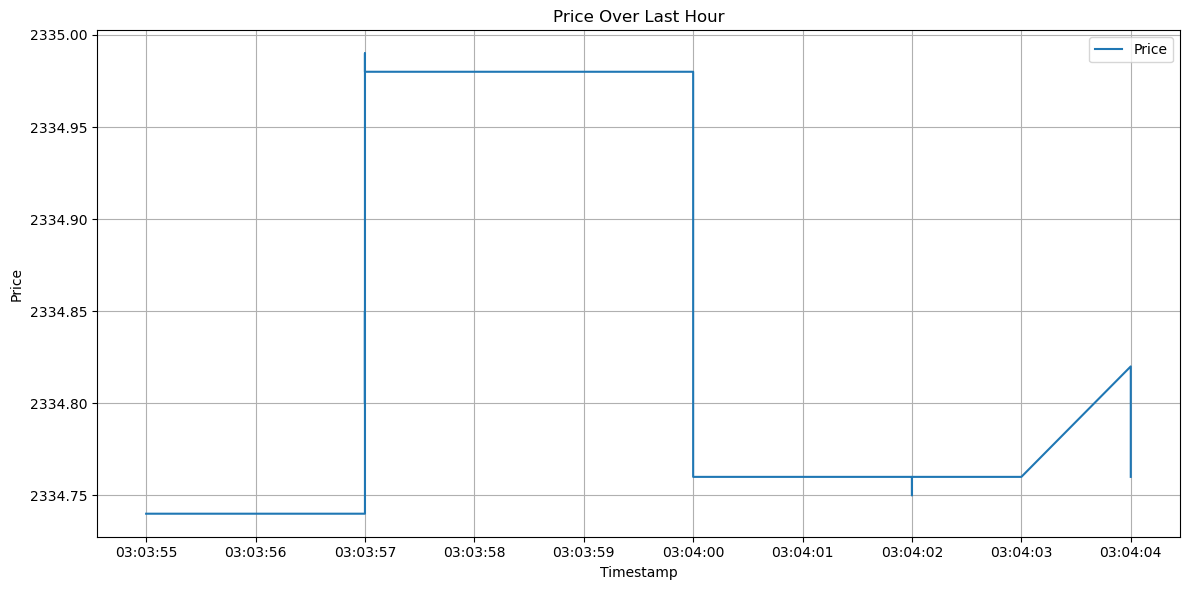

In [193]:
# Ensure timestamp is datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot price over time
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='Price')
plt.title('Price Over Last Hour')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [194]:
len(df)  # Display the number of rows in the DataFrame

95

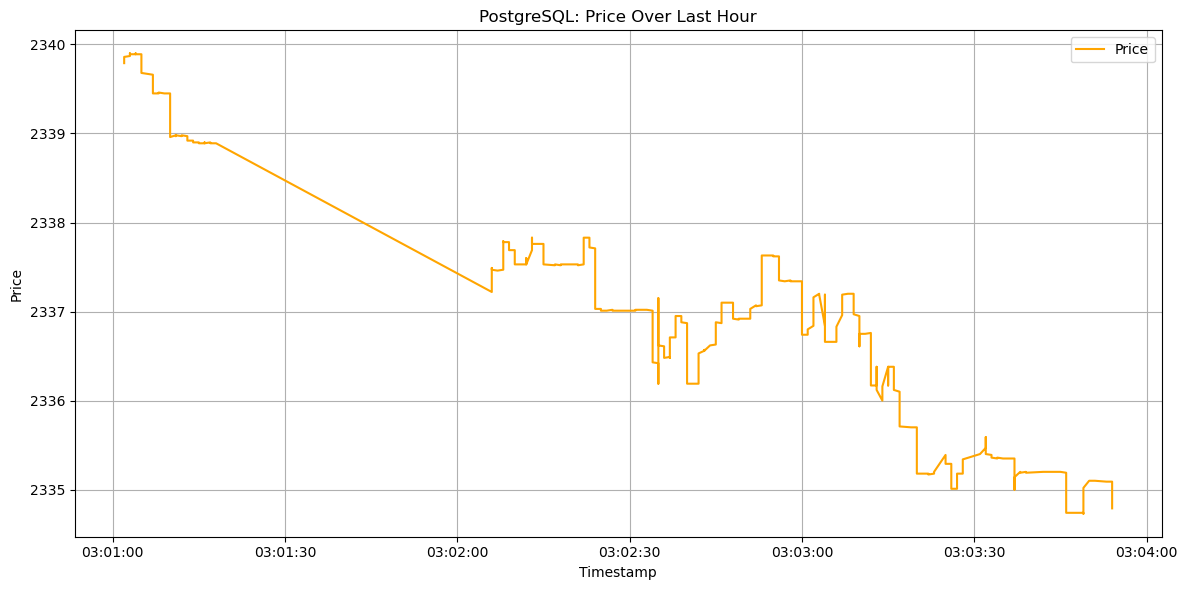

In [195]:
# postgres_plot.py

import psycopg2
import pandas as pd
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname='price_data',
    user='postgres',
    password='mypgpassword',
    host='localhost',
    port=5432
)
cursor = conn.cursor()

# Define time range
one_hour_ago = datetime.now(timezone.utc) - timedelta(hours=1)

# Fetch data
query = """
SELECT timestamp, price, volume
FROM price_ticks
WHERE timestamp >= %s
ORDER BY timestamp ASC
"""
cursor.execute(query, (one_hour_ago,))
rows = cursor.fetchall()

# Convert to DataFrame
df_pg = pd.DataFrame(rows, columns=['timestamp', 'price', 'volume'])
df_pg['timestamp'] = pd.to_datetime(df_pg['timestamp'])

# Plot price over time
plt.figure(figsize=(12, 6))
plt.plot(df_pg['timestamp'], df_pg['price'], label='Price', color='orange')
plt.title('PostgreSQL: Price Over Last Hour')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [196]:
len(df_pg)

2406